# project 1


## 2.1 plot histograms

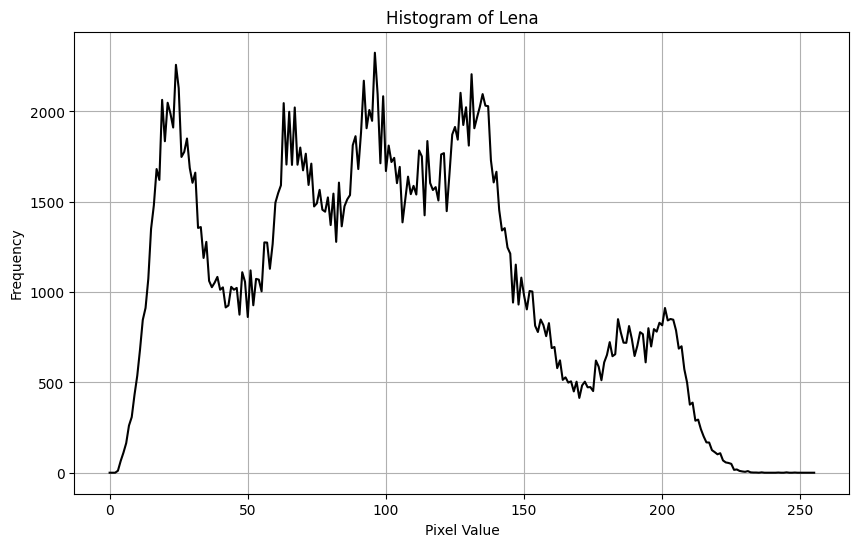

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/lena512.bmp', cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError("cannot find image")

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(10, 6))
plt.plot(hist, color='black')
plt.title("Histogram of Lena")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## 2.1 a low-contrast image

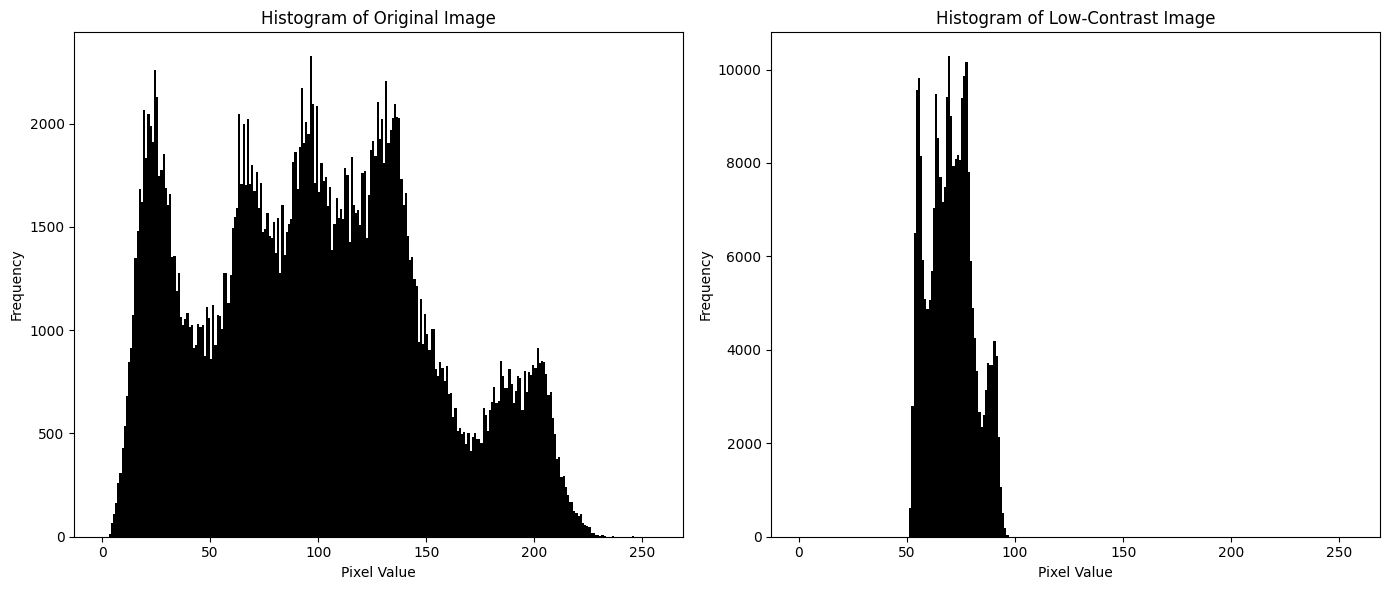

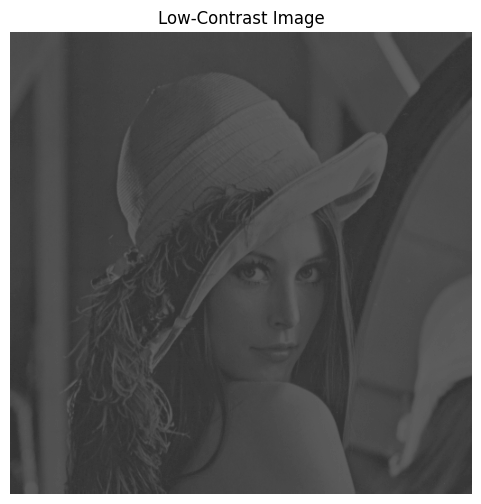

In [ ]:
a = 0.2
b = 50
low_contrast_image = np.clip(np.round(a * image + b), 0, 255).astype(np.uint8)

# plot contrast
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# original
axes[0].hist(image.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Original Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

# low_contrast
axes[1].hist(low_contrast_image.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Low-Contrast Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# plot img
plt.figure(figsize=(6, 6))
plt.imshow(low_contrast_image, cmap='gray', vmin=0, vmax=255)
plt.title("Low-Contrast Image")
plt.axis('off')
plt.show()

## 2.1 equalization

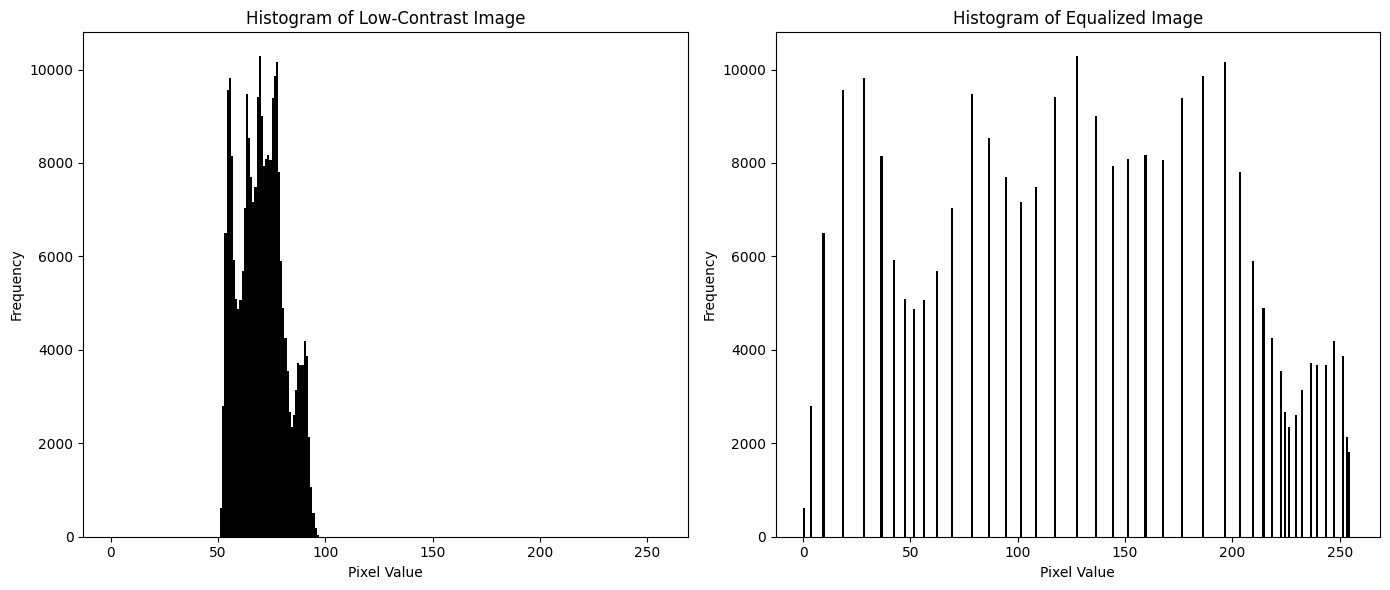

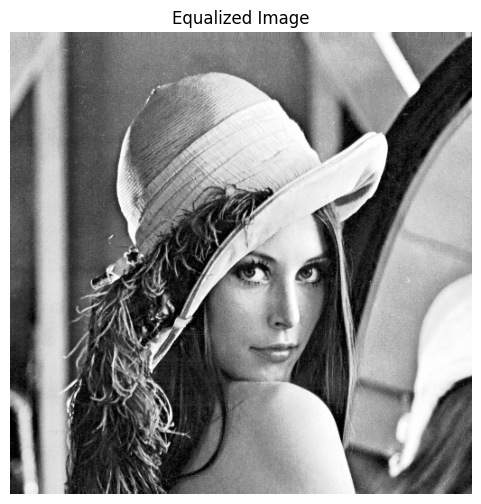

In [5]:
def histogram_equalization(img):

    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # CDF
    cdf = hist.cumsum()
    cdf_normalized = cdf * (255 / cdf[-1])  

    img_equalized = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape).astype(np.uint8)
    
    return img_equalized

equalized_image = histogram_equalization(low_contrast_image)

# plot histgram contrast
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# low_contrast_image
axes[0].hist(low_contrast_image.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Low-Contrast Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

# after equalization
axes[1].hist(equalized_image.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Equalized Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# plot img
plt.figure(figsize=(6, 6))
plt.imshow(equalized_image, cmap='gray', vmin=0, vmax=255)
plt.title("Equalized Image")
plt.axis('off')
plt.show()

## 2.2 image denoising

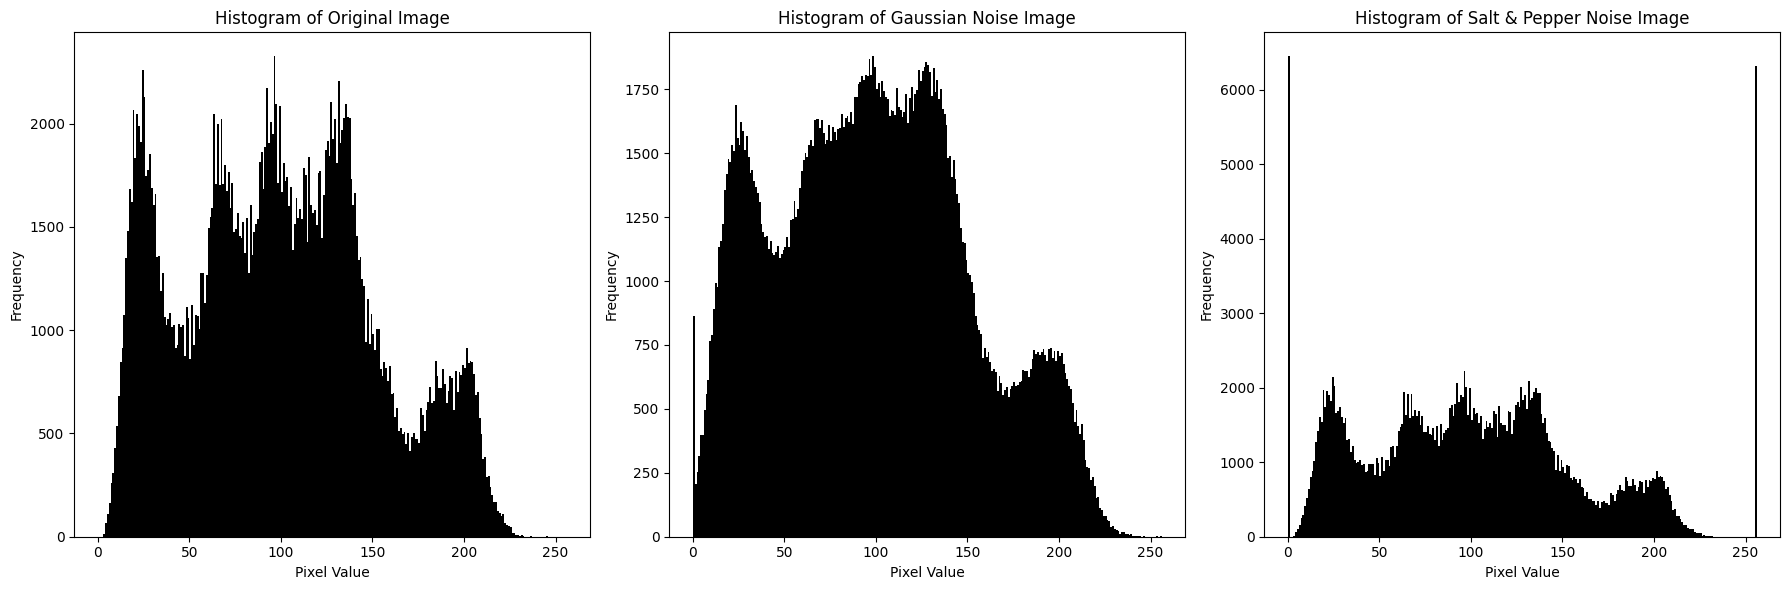

In [ ]:
image_2_2 = cv2.imread('images/lena512.bmp', cv2.IMREAD_GRAYSCALE)

# gaussian noise
mean = 0
variance = 64
gaussian_noise = np.random.normal(mean, np.sqrt(variance), image_2_2.shape)
noisy_gaussian = np.clip(image_2_2 + gaussian_noise, 0, 255).astype(np.uint8)

# salt noise
salt_pepper_prob = 0.05
noisy_salt_pepper = np.copy(image_2_2)
num_salt = np.ceil(salt_pepper_prob * image_2_2.size * 0.5)
num_pepper = np.ceil(salt_pepper_prob * image_2_2.size * 0.5)

# salt
coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image_2_2.shape]
noisy_salt_pepper[coords[0], coords[1]] = 255

# saltpepper
coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image_2_2.shape]
noisy_salt_pepper[coords[0], coords[1]] = 0


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(image_2_2.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Original Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(noisy_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Gaussian Noise Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(noisy_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[2].set_title("Histogram of Salt & Pepper Noise Image")
axes[2].set_xlabel("Pixel Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

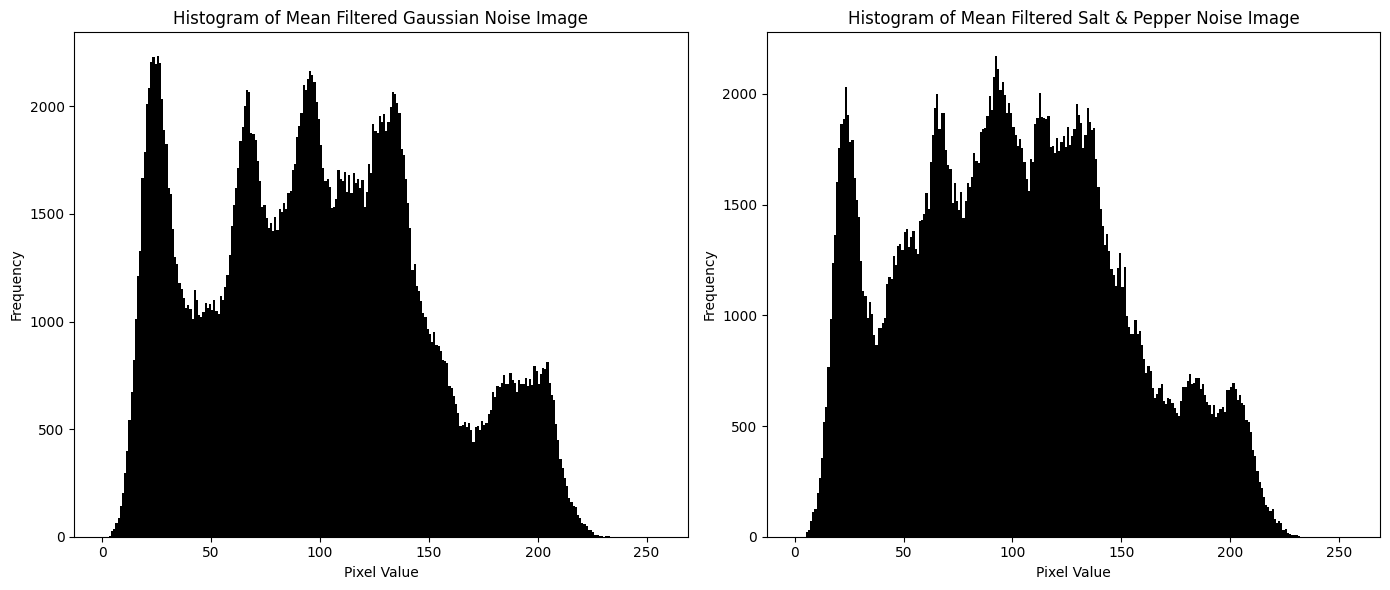

In [ ]:
# 3*3 mean filter


mean_filtered_gaussian = cv2.blur(noisy_gaussian, (3, 3))
mean_filtered_salt_pepper = cv2.blur(noisy_salt_pepper, (3, 3))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(mean_filtered_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Mean Filtered Gaussian Noise Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(mean_filtered_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Mean Filtered Salt & Pepper Noise Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

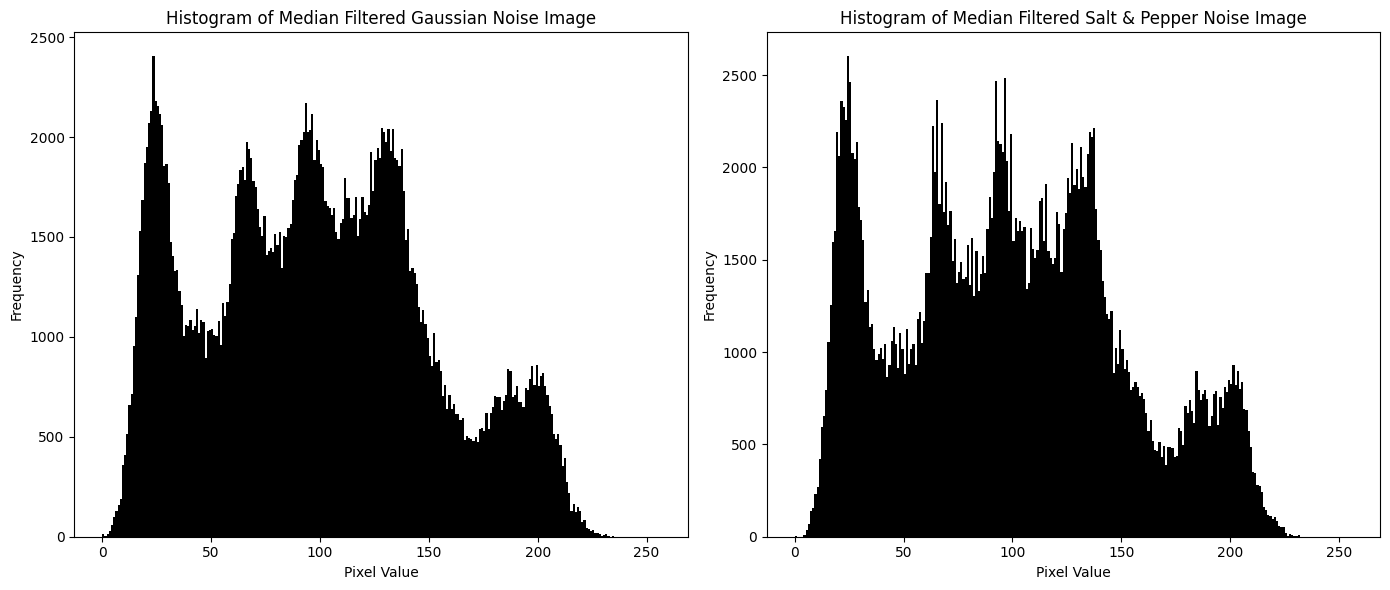

In [ ]:
# median filter

median_filtered_gaussian = cv2.medianBlur(noisy_gaussian, 3)
median_filtered_salt_pepper = cv2.medianBlur(noisy_salt_pepper, 3)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].hist(median_filtered_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Median Filtered Gaussian Noise Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(median_filtered_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Median Filtered Salt & Pepper Noise Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 2.2 summary

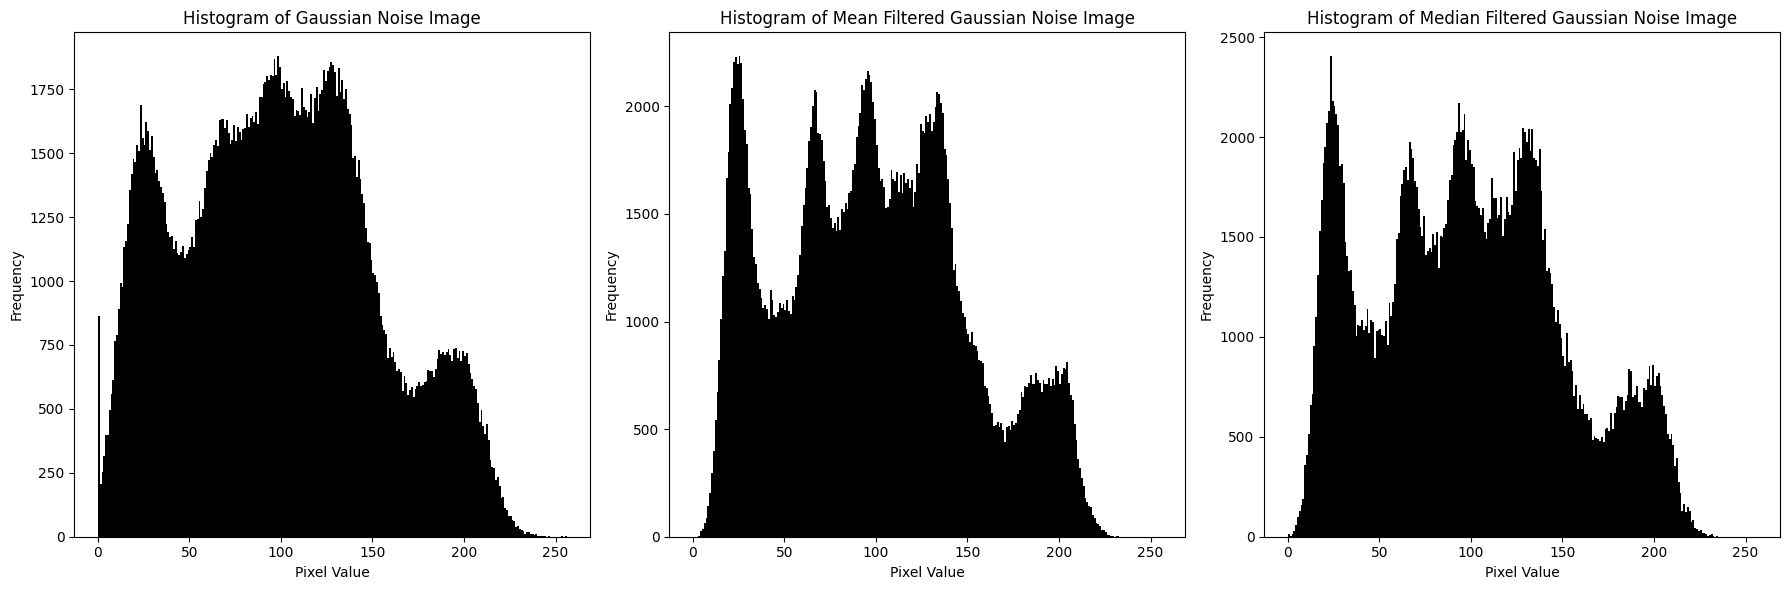

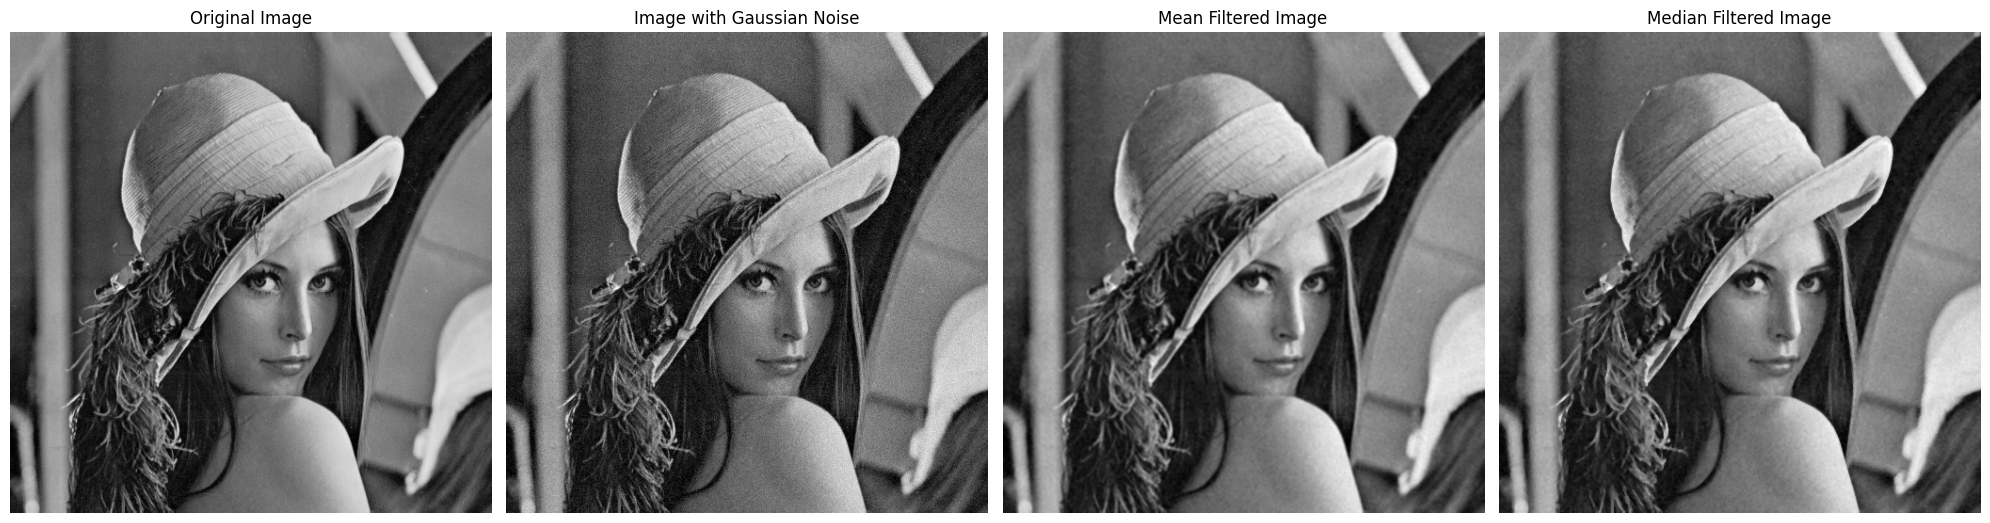

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(noisy_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Gaussian Noise Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(mean_filtered_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Mean Filtered Gaussian Noise Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(median_filtered_gaussian.ravel(), bins=256, range=[0, 256], color='black')
axes[2].set_title("Histogram of Median Filtered Gaussian Noise Image")
axes[2].set_xlabel("Pixel Value")
axes[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(20, 10))

axes[0].imshow(image_2_2, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(noisy_gaussian, cmap='gray')
axes[1].set_title("Image with Gaussian Noise")
axes[1].axis('off')

axes[2].imshow(mean_filtered_gaussian, cmap='gray')
axes[2].set_title("Mean Filtered Image")
axes[2].axis('off')

axes[3].imshow(median_filtered_gaussian, cmap='gray')
axes[3].set_title("Median Filtered Image")
axes[3].axis('off')

plt.tight_layout()
plt.show()

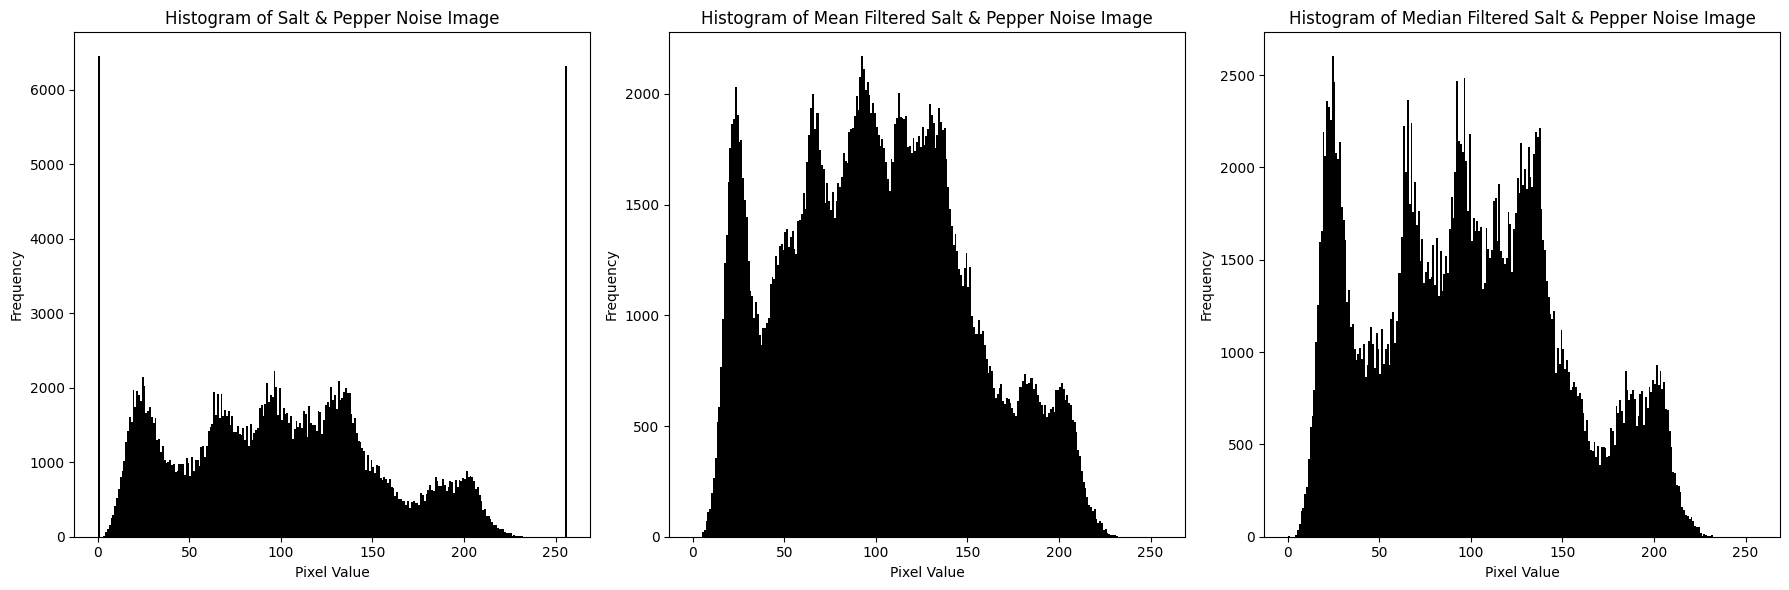

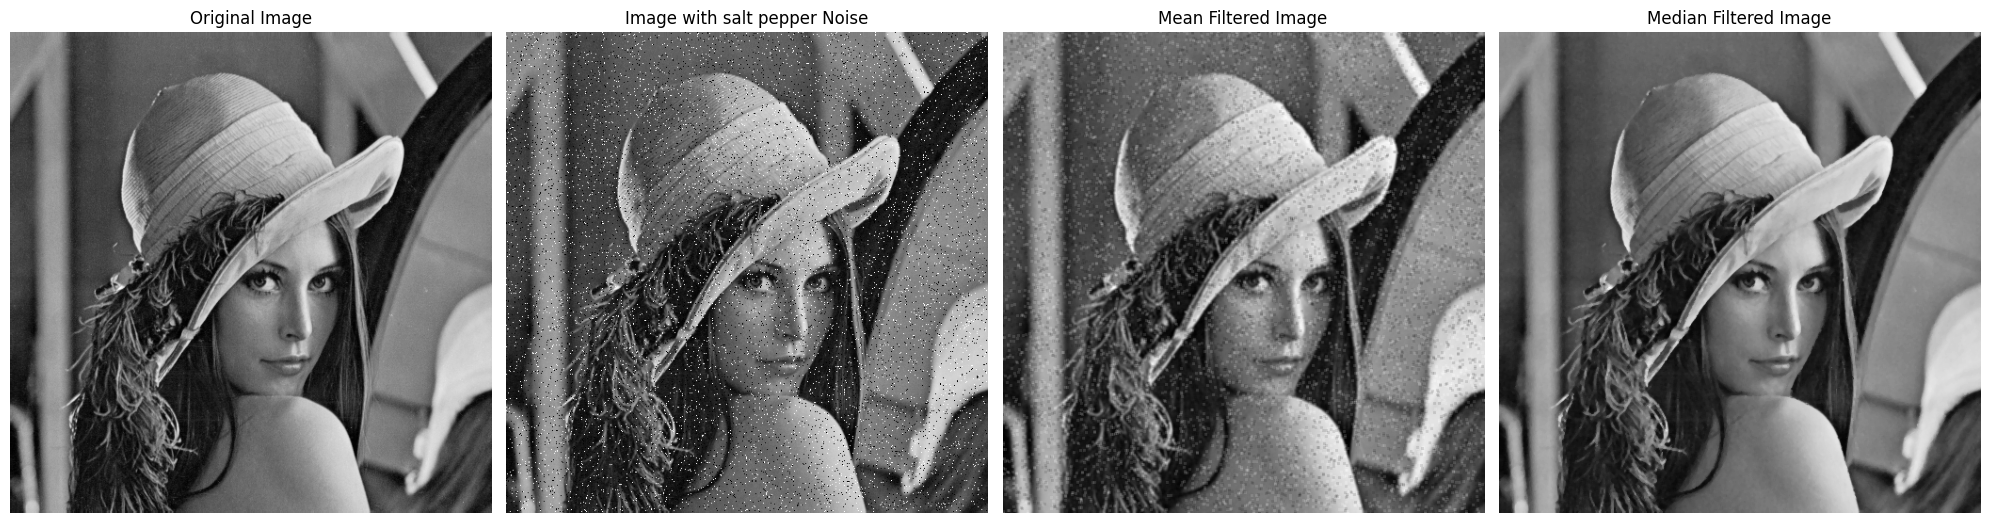

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(noisy_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[0].set_title("Histogram of Salt & Pepper Noise Image")
axes[0].set_xlabel("Pixel Value")
axes[0].set_ylabel("Frequency")

axes[1].hist(mean_filtered_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[1].set_title("Histogram of Mean Filtered Salt & Pepper Noise Image")
axes[1].set_xlabel("Pixel Value")
axes[1].set_ylabel("Frequency")

axes[2].hist(median_filtered_salt_pepper.ravel(), bins=256, range=[0, 256], color='black')
axes[2].set_title("Histogram of Median Filtered Salt & Pepper Noise Image")
axes[2].set_xlabel("Pixel Value")
axes[2].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(20, 10))

axes[0].imshow(image_2_2, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(noisy_salt_pepper, cmap='gray')
axes[1].set_title("Image with salt pepper Noise")
axes[1].axis('off')

axes[2].imshow(mean_filtered_salt_pepper, cmap='gray')
axes[2].set_title("Mean Filtered Image")
axes[2].axis('off')

axes[3].imshow(median_filtered_salt_pepper, cmap='gray')
axes[3].set_title("Median Filtered Image")
axes[3].axis('off')

plt.tight_layout()
plt.show()

## 3 Frequency domain filtering

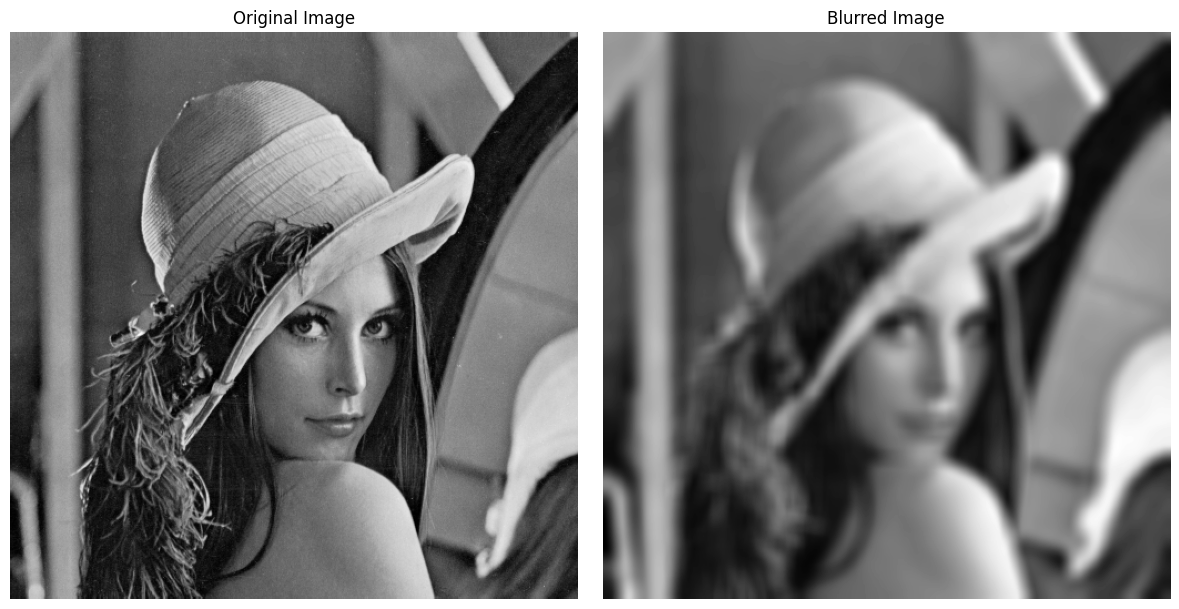

In [ ]:
image_3 = cv2.imread('images/lena512.bmp', cv2.IMREAD_GRAYSCALE)


kernel_size = 17 
gaussian_kernel = cv2.getGaussianKernel(kernel_size, 8)
gaussian_kernel = gaussian_kernel @ gaussian_kernel.T  


blurred_image = cv2.filter2D(image_3, -1, gaussian_kernel)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image_3, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

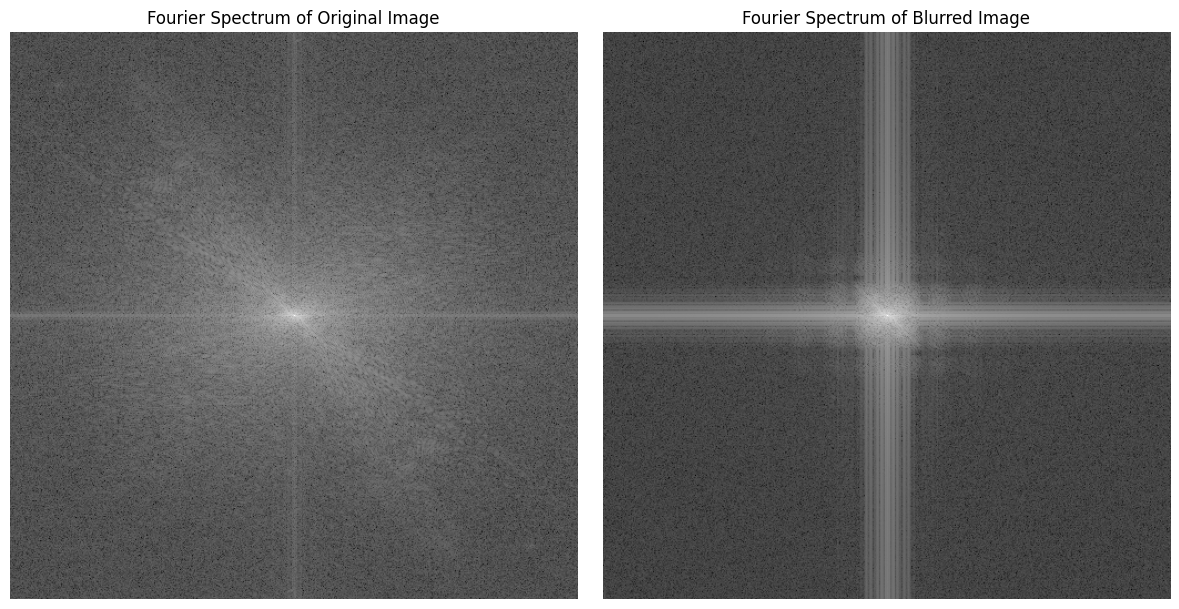

In [ ]:
f_image = np.fft.fft2(image_3)
f_blurred = np.fft.fft2(blurred_image)

# fftshift
f_image_shifted = np.fft.fftshift(f_image)
f_blurred_shifted = np.fft.fftshift(f_blurred)

# log
spectrum_image = np.log(1 + np.abs(f_image_shifted))
spectrum_blurred = np.log(1 + np.abs(f_blurred_shifted))

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(spectrum_image, cmap='gray')
axes[0].set_title("Fourier Spectrum of Original Image")
axes[0].axis('off')

axes[1].imshow(spectrum_blurred, cmap='gray')
axes[1].set_title("Fourier Spectrum of Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

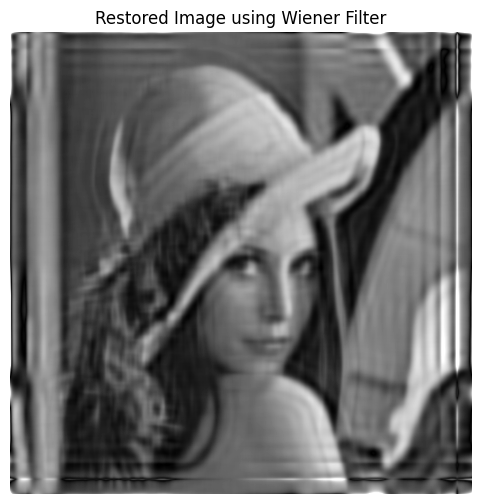

In [ ]:
def wiener_filter(blurred, kernel, K=0.01):

    G = np.fft.fft2(blurred)
    H = np.fft.fft2(kernel, s=blurred.shape)
    
    # F_hat = (1/H) * (|H|^2 / (|H|^2 + K)) * G
    H_conj = np.conj(H)
    H_abs2 = np.abs(H)**2
    F_hat = (H_conj / (H_abs2 + K)) * G
    
    restored_image = np.fft.ifft2(F_hat)
    restored_image = np.abs(restored_image)
    return np.clip(restored_image, 0, 255).astype(np.uint8)

restored_image = wiener_filter(blurred_image, gaussian_kernel)

plt.figure(figsize=(6, 6))
plt.imshow(restored_image, cmap='gray')
plt.title("Restored Image using Wiener Filter")
plt.axis('off')
plt.show()